In [1]:
import pystan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#We begin with creating stan models for negative binomial distributions with different parametrizations.

In [2]:
negBi1 = """
data {
    real alpha;
    real beta;
}
generated quantities {
    real y = neg_binomial_rng(alpha, beta);
}
"""
modelNegBi1 = pystan.StanModel(model_code = negBi1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_bf530e9287f1dacee4095f0fe9a7eb98 NOW.


In [3]:
negBi2 = """
data {
    real mu;
    real phi;
}
generated quantities {
    real y = neg_binomial_2_rng(mu, phi);
}
"""
modelNegBi2 = pystan.StanModel(model_code = negBi2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_455d3f9ec35a5ce2cf883b247c9a2a1c NOW.


In [4]:
#We want to get distributions with mean = 2 and variance = 3. To do so, we set alpha = 4, beta = 2, mu = 2, phi = 4.
#These values were obtained with the use of the formulas from stan documentation.
dataNegBi1 = {'alpha': 4, 'beta': 2}
dataNegBi2 = {'mu': 2, 'phi': 4}
sim_pcc_neg_bi1 = modelNegBi1.sampling(data = dataNegBi1, algorithm = 'Fixed_param', iter = 1000)
sim_pcc_neg_bi2 = modelNegBi2.sampling(data = dataNegBi2, algorithm = 'Fixed_param', iter = 1000)
negBi1 = pd.DataFrame(sim_pcc_neg_bi1.extract())
negBi2 = pd.DataFrame(sim_pcc_neg_bi2.extract())

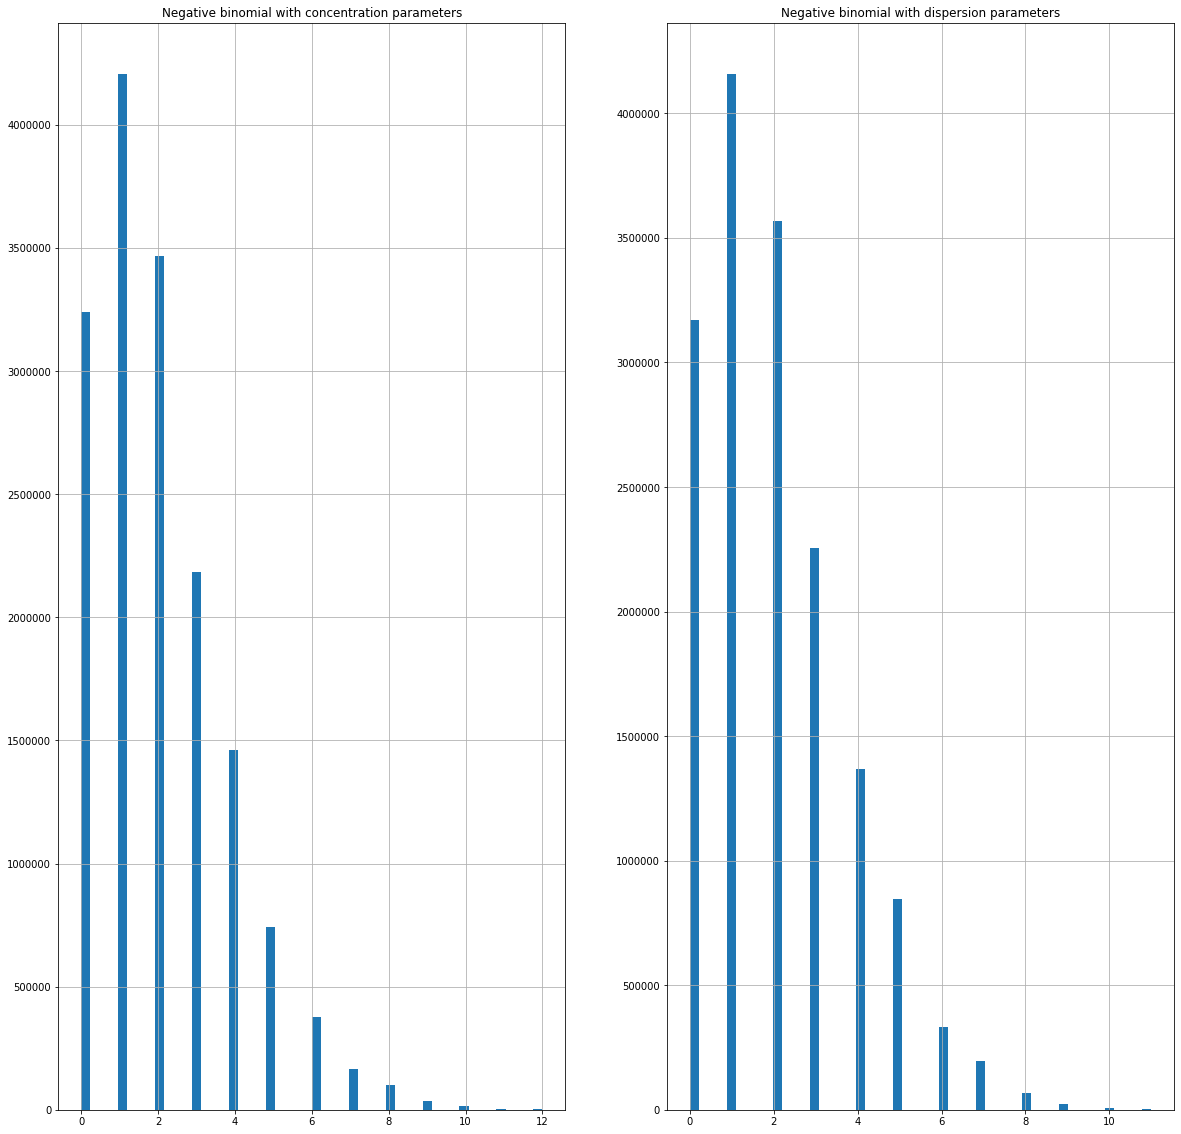

In [7]:
negBi1.columns = ['negBi1', 'lp__']
negBi2.columns = ['negBi2', 'lp__']
negBi = negBi1.merge(negBi2)
negBi.drop('lp__', axis = 1, inplace = True)
plt.figure(figsize = [20, 20])
plt.subplot(1, 2, 1).set_title("Negative binomial with concentration parameters")
plt.hist(negBi['negBi1'], bins = 50)
plt.grid()
plt.subplot(1, 2, 2).set_title("Negative binomial with dispersion parameters")
plt.hist(negBi['negBi2'], bins = 50)
plt.grid()
plt.show()

In [6]:
#We see that the distributions are almost the same, as expected.
#Now we get Poisson distribution with mean = 2 and compare it with negative binomial.

poisson = """
data {
    real lambda;
}
generated quantities {
    real y = poisson_rng(lambda);
}
"""
modelPoisson = pystan.StanModel(model_code = poisson)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_561eb27601f382bd5393c5c214972a4b NOW.


In [8]:
dataPoisson = {'lambda': 2}
sim_pcc_poisson = modelPoisson.sampling(data = dataPoisson, algorithm = 'Fixed_param', iter = 1000)
poisson = pd.DataFrame(sim_pcc_poisson.extract())

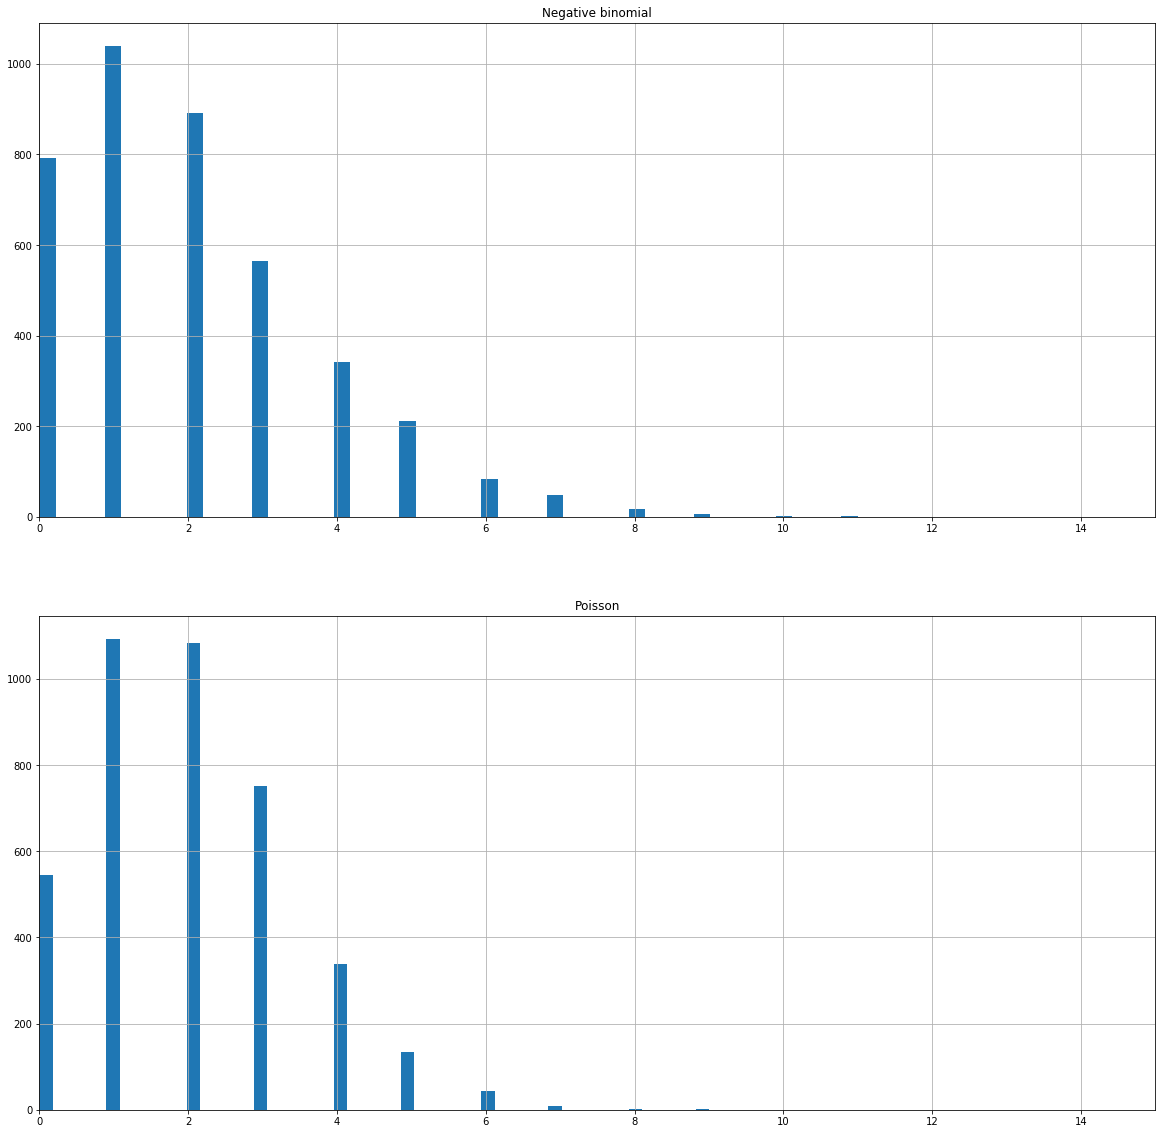

In [12]:
poisson.columns = ['poisson', 'lp__']
negBiWithPoisson = pd.merge(negBi, poisson, left_index = True, right_index = True)
negBiWithPoisson.drop(['lp__', 'negBi1'], axis = 1, inplace = True)
negBiWithPoisson.columns = ['negBi', 'poisson']
plt.figure(figsize = [20, 20])
plt.subplot(2, 1, 1).set_title('Negative binomial')
plt.hist(negBiWithPoisson['negBi'], bins = 50)
plt.xlim((0, 15))
plt.grid()
plt.subplot(2, 1, 2).set_title('Poisson')
plt.hist(negBiWithPoisson['poisson'], bins = 50)
plt.xlim((0, 15))
plt.grid()
plt.show()

In [ ]:
#We see that Poisson distribution has a different mode and decreases faster 
#(which is not a surprise, since it has lower variance).